# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

## Решение

### 1. Подготовка построения двухслойной нейронной сети на numpy

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [3]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")


# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y).argmax(axis=1)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### 2. Разработанная на уроке двухслойная сеть

* число нейронов скрытого слоя: 5
* число эпох: 300
* число слоев: 2

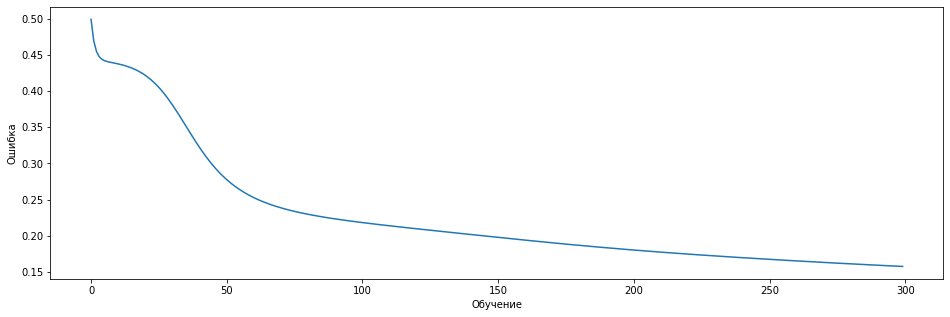

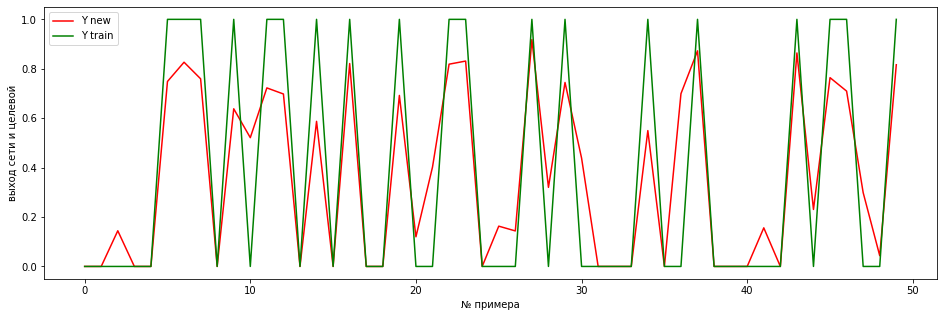

Аккуратность нейронной сети 84.24%


In [17]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(300):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

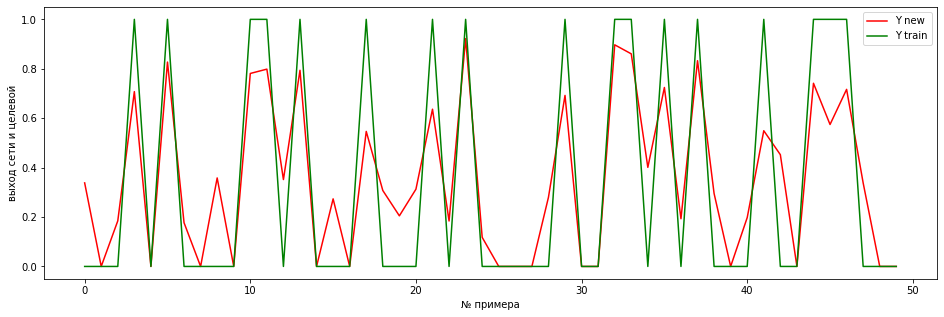

Аккуратность нейронной сети на тесте 83.61%


In [18]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### 2. Построение нейронной сети при фиксированном числе нейронов скрытого слоя
* число нейронов скрытого слоя: 5
* число эпох: 300, 2700, 5100, 7500, 9900
* скорость обучения: 0.001, 0.01,  0.1,   1
* число слоев: 2

In [4]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, ShuffleSplit 
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
from sklearn.base import BaseEstimator

class NN(BaseEstimator):
    def __init__(self, iters=1, learning_rate=1):
        self.iters = iters
        self.learning_rate = learning_rate
        self.w0 = 2*np.random.random((4, 5))
        self.w1 = 2*np.random.random((5, 3))     
        

    def fit(self, X_train, y_train):
        
        self.errors = []
        y_train = to_one_hot(y_train)
        
        for i in range(int(self.iters)):
        
            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, self.w0))
            layer2 = sigmoid(np.dot(layer1, self.w1))
        
            # обратное распространение(back propagation) с использованиемd градиентного спуска
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)
            
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            
            self.w1 += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w0 += layer0.T.dot(layer1_delta) * self.learning_rate
            
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
    
    
    def predict(self, X_test):
        layer0 = X_test
        layer1 = sigmoid(np.dot(layer0, self.w0))
        layer2 = sigmoid(np.dot(layer1, self.w1))
        return layer2.argmax(axis=1)
    
    # score - accuracy
    def score(self, x, y):
        layer0 = x
        layer1 = sigmoid(np.dot(layer0, self.w0))
        layer2 = sigmoid(np.dot(layer1, self.w1))
        layer2_error = to_one_hot(y) - layer2
        error = np.mean(np.abs(layer2_error))
        accuracy = (1 - error) * 100
        return accuracy

In [8]:
result = []

# сетка параметров
rate_space = np.logspace(-3, 0, 4)
iters_space = np.linspace(300,9900,5).astype(int)


# кросс-валидатор
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# счетчик для отображения прогресса
counter_len = len(rate_space)*len(iters_space)
counter = 0


for learning_rate in rate_space:
    for iters in iters_space:
        
        # отображение прогесса вычислений
        counter += 1
        print(f'{counter}/{counter_len} ({counter*100/counter_len:.1f}%)', end='\r')
        
        # средний скор на кросс-валидации (score - accuracy)
        mean_accuracy = cross_val_score(NN(iters, learning_rate), x, y, cv=cv).mean()
        
        # накопление результатов
        result.append([learning_rate,iters, mean_accuracy])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


In [9]:
# Лучшие оценки
pd.DataFrame(result, columns=['learning rate','iters','accuracy']).sort_values('accuracy',ascending=False).head(3)

,learning rate,iters,accuracy
12,0.1,5100,97.083254
13,0.1,7500,97.011105
14,0.1,9900,96.716188


### 3. Построение нейронной сети при фиксированной скорости обучения
* число нейронов скрытого слоя: 5,  20,  36,  52,  68,  84, 100
* число эпох: 300, 2700, 5100, 7500, 9900
* скорость обучения: 0.1
* число слоев: 2

In [15]:
class NN_ni(BaseEstimator):
    def __init__(self, iters=1, learning_rate=0.1, neurons=5):
        self.iters = iters
        self.learning_rate = learning_rate
        self.neurons = neurons
        self.w0 = 2*np.random.random((4, neurons))
        self.w1 = 2*np.random.random((neurons, 3))     
        

    def fit(self, X_train, y_train):
        
        self.errors = []
        y_train = to_one_hot(y_train)
        
        for i in range(int(self.iters)):
        
            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, self.w0))
            layer2 = sigmoid(np.dot(layer1, self.w1))
        
            # обратное распространение(back propagation) с использованиемd градиентного спуска
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)
            
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            
            self.w1 += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w0 += layer0.T.dot(layer1_delta) * self.learning_rate
            
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
    
    
    def predict(self, X_test):
        layer0 = X_test
        layer1 = sigmoid(np.dot(layer0, self.w0))
        layer2 = sigmoid(np.dot(layer1, self.w1))
        return layer2.argmax(axis=1)
    
    # score - accuracy
    def score(self, x, y):
        layer0 = x
        layer1 = sigmoid(np.dot(layer0, self.w0))
        layer2 = sigmoid(np.dot(layer1, self.w1))
        layer2_error = to_one_hot(y) - layer2
        error = np.mean(np.abs(layer2_error))
        accuracy = (1 - error) * 100
        return accuracy

In [18]:
result_ni = []

# сетка параметров
rate_space = [0.1]
neurons_space = np.linspace(5,100,7).astype(int)
iters_space = np.linspace(300,9900,5).astype(int)


# кросс-валидатор
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# счетчик для отображения прогресса
counter_len = len(rate_space)*len(iters_space)*len(neurons_space)
counter = 0


for learning_rate in rate_space:
    for neurons in neurons_space:
        for iters in iters_space:
        
            # отображение прогесса вычислений
            counter += 1
            print(f'{counter}/{counter_len} ({counter*100/counter_len:.1f}%)', end='\r')
        
            # средний скор на кросс-валидации (score - accuracy)
            mean_accuracy = cross_val_score(NN_ni(iters, learning_rate, neurons), x, y, cv=cv).mean()
        
            # накопление результатов
            result_ni.append([learning_rate,iters, neurons, mean_accuracy])

In [22]:
# Лучшие оценки
pd.DataFrame(result_ni, columns=['learning rate','iters','neurons','accuracy']).sort_values('accuracy',ascending=False).head(10)

,learning rate,iters,neurons,accuracy
9,0.1,9900,20,96.949457
13,0.1,7500,36,96.852150
18,0.1,7500,52,96.830007
24,0.1,9900,68,96.798371
29,0.1,9900,84,96.791861
23,0.1,7500,68,96.706924
17,0.1,5100,52,96.676108
33,0.1,7500,100,96.672186
19,0.1,9900,52,96.660146
28,0.1,7500,84,96.653113


**Вывод**

***В рассматриваемом примере с ростом числа эпох увеличивается точность нейронной сети. Увеличение числа нейронов (ширины) скрытого слоя до определенных значений увеличивает точность нейронной сети, а дальнейшее увеличение ширины слоя приводит к снижению точности.***

#### Обучение на лучших параметрах

In [25]:
best_clf = NN_ni(iters=9900, learning_rate=0.1, neurons=20)
best_clf.fit(X_train, y_train)

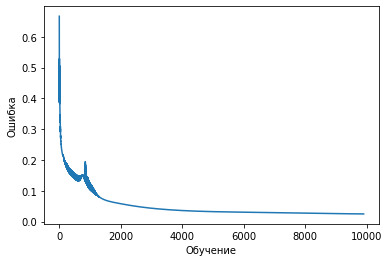

In [26]:
# Демонстрация ошибки во время обучения
plt.plot(best_clf.errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() 

#### Отчет по классификации

In [27]:
y_pred = best_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.86      0.92      0.89        13
           2       0.88      0.88      0.88        16

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.92      0.92      0.92        50



#### Матрица смежности

In [28]:
print(confusion_matrix(y_test,y_pred))

[[20  0  1]
 [ 0 12  1]
 [ 0  2 14]]
